#**Importing Libraries**


In [ ]:
import tensorflow as tf
import keras
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sklearn
import torch
import scipy
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split

#**Importing Dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/merged_dataset_processed.csv")
dataset

,File,Filename,First_commit,Last_commit,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors,Time_Class
0,https://github.com/Anish-Agnihotri/dhof-loot/b...,images.js,"Aug 27, 2021","Aug 28, 2021",1,1,31,228,1,4,0,1,1,0,0,1,1
1,https://github.com/Anish-Agnihotri/dhof-loot/b...,index.js,"Aug 27, 2021","Aug 28, 2021",2,1,36,230,1,2,0,0,1,0,0,1,1
2,https://github.com/Anish-Agnihotri/dhof-loot/b...,parse.js,"Aug 27, 2021","Sep 3, 2021",8,7,53,467,6,6,1,0,6,0,0,1,1
3,https://github.com/HashLips/generative-art-ope...,index1.js,"Aug 24, 2021","Sep 1, 2021",7,8,183,1280,26,35,1,3,2,2,0,1,1
4,https://github.com/HashLips/generative-art-ope...,config.js,"Aug 24, 2021","Sep 2, 2021",7,9,113,637,10,16,1,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://github.com/mozilla/pdf.js/blob/master/...,simpleviewer.js,"Sep 30, 2014","Jul 29, 2021",23,2494,51,270,2,3,1,2,0,0,0,5,6
196,https://github.com/mozilla/pdf.js/blob/master/...,viewer.js,"Jul 27, 2016","Mar 12, 2021",23,1689,344,1930,35,68,18,18,0,2,0,5,5
197,https://github.com/mozilla/pdf.js/blob/master/...,pdf2svg.js,"Aug 14, 2014","Mar 12, 2021",25,2402,104,700,15,20,14,3,1,1,0,5,6
198,https://github.com/mozilla/pdf.js/blob/master/...,getinfo.js,"Apr 19, 2014","Mar 12, 2021",17,2519,55,391,9,11,7,1,1,0,0,5,6


#**Methodology 1**

##**Seperating Labels from Dataset**

In [ ]:
Author_lbl = dataset["Number_of_Authors"]

In [ ]:
Author_lbl.value_counts()

5    40
4    40
3    40
2    40
1    40
Name: Number_of_Authors, dtype: int64

##**Keeping the columns with only numerical data**

In [ ]:
dataset_unlbl = dataset.drop(columns=["File","Filename","First_commit","Last_commit","Number_of_Authors"])

In [ ]:
dataset_unlbl

,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Time_Class
0,1,1,31,228,1,4,0,1,1,0,0,1
1,2,1,36,230,1,2,0,0,1,0,0,1
2,8,7,53,467,6,6,1,0,6,0,0,1
3,7,8,183,1280,26,35,1,3,2,2,0,1
4,7,9,113,637,10,16,1,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,2494,51,270,2,3,1,2,0,0,0,6
196,23,1689,344,1930,35,68,18,18,0,2,0,5
197,25,2402,104,700,15,20,14,3,1,1,0,6
198,17,2519,55,391,9,11,7,1,1,0,0,6


##**Splitting the dataset into train and test**

In [ ]:
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_unlbl, Author_lbl, test_size=0.2, random_state=1)


In [ ]:
print(dataset_X_train.shape)
print(dataset_X_test.shape)

(160, 12)
(40, 12)


##**Creating lists to store model data and scores**

In [ ]:
Classifier = []
Type = []
hyper = []
Accuracy = []
F1_score = []
Recall = []
Precision = []

#**MACHINE LEARNING**

##**Creating models by tuning hyperparameters**

In [ ]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score , accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l1','l2']
# Create regularization hyperparameter space
c_values = numpy.logspace(0, 5, 20)
# Create hyperparameter options
hyperparameters_LR = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf_LR = GridSearchCV(estimator=classifier_LR, param_grid=hyperparameters_LR, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.svm import SVC
classifier_SVM = SVC()  
# defining parameter range
hyperparameters_SVM = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
clf_SVM = GridSearchCV(estimator=classifier_SVM, param_grid = hyperparameters_SVM ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
hyperparameters_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
  
clf_RF = GridSearchCV(estimator=classifier_RF, param_grid = hyperparameters_RF ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 

##**Training and testing before hyperparameter tuning**

In [ ]:
SVM = classifier_SVM.fit(dataset_X_train, dataset_y_train)

y_pred_SVM = SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM))


Classifier.append("SVM")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM,average='macro'))
#ROC_AUC.append(roc_curve(dataset_y_test,y_pred_SVM,multi_class='ovr'))

Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.24      0.75      0.36         8
           3       0.25      0.14      0.18         7
           4       0.11      0.50      0.18         2
           5       1.00      0.17      0.29        12

    accuracy                           0.25        40
   macro avg       0.32      0.31      0.20        40
weighted avg       0.40      0.25      0.20        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
LR = classifier_LR.fit(dataset_X_train, dataset_y_train)

# Predicting the Test set results
y_pred_LR = LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR))


Classifier.append("LR")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR))
F1_score.append(f1_score(dataset_y_test,y_pred_LR,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

Test - ACC :  0.225
Test  : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.11      1.00      0.20         2
           5       0.39      0.58      0.47        12

    accuracy                           0.23        40
   macro avg       0.10      0.32      0.13        40
weighted avg       0.12      0.23      0.15        40



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [ ]:
RF = classifier_RF.fit(dataset_X_train, dataset_y_train)


# Predicting the Test set results
y_pred_RF = RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF))



Classifier.append("RF")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF))
F1_score.append(f1_score(dataset_y_test,y_pred_RF,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

Test - ACC :  0.45
Test  : 
              precision    recall  f1-score   support

           1       0.62      0.45      0.53        11
           2       0.40      0.25      0.31         8
           3       0.56      0.71      0.63         7
           4       0.09      0.50      0.15         2
           5       0.71      0.42      0.53        12

    accuracy                           0.45        40
   macro avg       0.48      0.47      0.43        40
weighted avg       0.57      0.45      0.48        40



##**Training and testing after hyperparameter tuning**

In [ ]:
best_SVM = clf_SVM.fit(dataset_X_train, dataset_y_train)

print(best_SVM.best_params_)
print("-------------------------------")

y_pred_SVM_best = best_SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM_best))


Classifier.append("SVM")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM_best))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_SVM,multi_class="ovr"))

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-------------------------------
Test - ACC :  0.325
Test  : 
              precision    recall  f1-score   support

           1       0.62      0.45      0.53        11
           2       0.33      0.12      0.18         8
           3       0.56      0.71      0.63         7
           4       0.00      0.00      0.00         2
           5       0.67      0.17      0.27        12

    accuracy                           0.33        40
   macro avg       0.44      0.29      0.32        40
weighted avg       0.54      0.33      0.37        40



In [ ]:
best_LR = clf_LR.fit(dataset_X_train, dataset_y_train)

print(best_LR.best_params_)
print("-------------------------------")

# Predicting the Test set results
y_pred_LR_best = best_LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR_best))


Classifier.append("LR")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR_best))
F1_score.append(f1_score(dataset_y_test,y_pred_LR_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
-------------------------------
Test - ACC :  0.425
Test  : 
              precision    recall  f1-score   support

           1       0.50      0.27      0.35        11
           2       0.14      0.12      0.13         8
           3       0.50      0.57      0.53         7
           4       0.18      1.00      0.31         2
           5       0.88      0.58      0.70        12

    accuracy                           0.42        40
   macro avg       0.44      0.51      0.41        40
weighted avg       0.53      0.42      0.44        40



In [ ]:
best_RF = clf_RF.fit(dataset_X_train, dataset_y_train)

print(best_RF.best_params_)
print("-------------------------------")
# Predicting the Test set results
y_pred_RF_best = best_RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF_best))



Classifier.append("RF")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF_best))
F1_score.append(f1_score(dataset_y_test,y_pred_RF_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF_best,average='macro'))


#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
-------------------------------
Test - ACC :  0.5
Test  : 
              precision    recall  f1-score   support

           1       0.67      0.36      0.47        11
           2       0.50      0.38      0.43         8
           3       0.60      0.86      0.71         7
           4       0.18      1.00      0.31         2
           5       0.71      0.42      0.53        12

    accuracy                           0.50        40
   macro avg       0.53      0.60      0.49        40
weighted avg       0.61      0.50      0.51        40



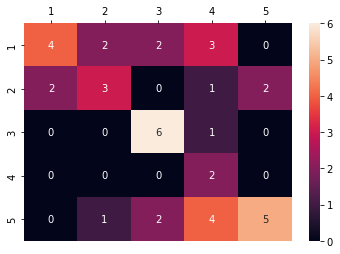

In [ ]:
ml_cm = confusion_matrix(dataset_y_test,y_pred_RF_best)
ax = sns.heatmap(ml_cm,xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5],annot=True)
ax.xaxis.set_ticks_position('top')
plt.show()

#**DEEP LEARNING**

In [ ]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

##**BEFORE HYPERPARAMETER TUNING**

###**Creating models**

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)
# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

###**Reshaping and changing data type of data as per model**

In [ ]:
dataset_X_train1 = dataset_X_train.values.reshape(160,12,1)
print(dataset_X_train1.dtype)
print(dataset_y_train.dtype)
dataset_X_train1 = dataset_X_train1.astype(float)
dataset_y_train1 = dataset_y_train.astype(float)
print(dataset_X_train1.dtype)
print(dataset_y_train1.dtype)

int64
int64
float64
float64


###**Training the deep learning models**

In [ ]:

# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 1000,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks = [early_stop])
    return history



In [ ]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/1000
13/13 [==============================] - 9s 132ms/step - loss: 5.8971 - val_loss: 1.8146
Epoch 2/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.9618 - val_loss: 1.9846
Epoch 3/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.7654 - val_loss: 1.6211
Epoch 4/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.6905 - val_loss: 1.5884
Epoch 5/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.6161 - val_loss: 1.5945
Epoch 6/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.5646 - val_loss: 1.5480
Epoch 7/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.5208 - val_loss: 1.5239
Epoch 8/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.4758 - val_loss: 1.5070
Epoch 9/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.4339 - val_loss: 1.4777
Epoch 10/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.3946 - val_l

In [ ]:
history_lstm = fit_model(model_lstm)

Epoch 1/1000
13/13 [==============================] - 4s 78ms/step - loss: 9.7115 - val_loss: 5.4279
Epoch 2/1000
13/13 [==============================] - 0s 13ms/step - loss: 3.8805 - val_loss: 1.7766
Epoch 3/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.1727 - val_loss: 1.9137
Epoch 4/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.9045 - val_loss: 1.7370
Epoch 5/1000
13/13 [==============================] - 0s 14ms/step - loss: 1.9429 - val_loss: 1.7004
Epoch 6/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.0672 - val_loss: 1.6887
Epoch 7/1000
13/13 [==============================] - 0s 13ms/step - loss: 1.9043 - val_loss: 1.6829
Epoch 8/1000
13/13 [==============================] - 0s 14ms/step - loss: 1.9840 - val_loss: 1.6787
Epoch 9/1000
13/13 [==============================] - 0s 13ms/step - loss: 1.8408 - val_loss: 1.6621
Epoch 10/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.8114 - val_lo

In [ ]:
history_gru = fit_model(model_gru)

Epoch 1/1000
13/13 [==============================] - 4s 67ms/step - loss: 8.3619 - val_loss: 4.1326
Epoch 2/1000
13/13 [==============================] - 0s 16ms/step - loss: 3.0767 - val_loss: 2.1443
Epoch 3/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.3287 - val_loss: 2.2743
Epoch 4/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.1982 - val_loss: 1.9772
Epoch 5/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.0953 - val_loss: 1.9322
Epoch 6/1000
13/13 [==============================] - 0s 16ms/step - loss: 1.9450 - val_loss: 1.9421
Epoch 7/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.0012 - val_loss: 1.8970
Epoch 8/1000
13/13 [==============================] - 0s 17ms/step - loss: 1.7649 - val_loss: 1.8511
Epoch 9/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.8483 - val_loss: 1.8127
Epoch 10/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.8775 - val_lo

###**Plotting graph for train and validation loss**

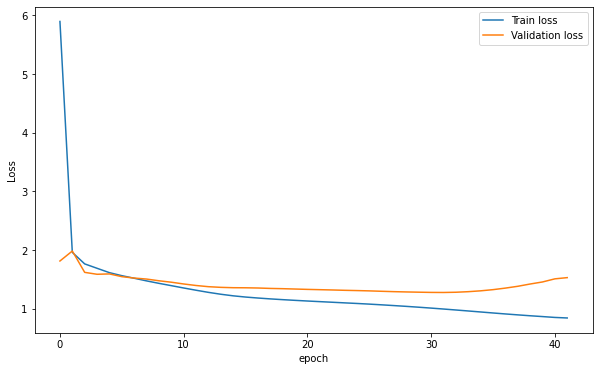

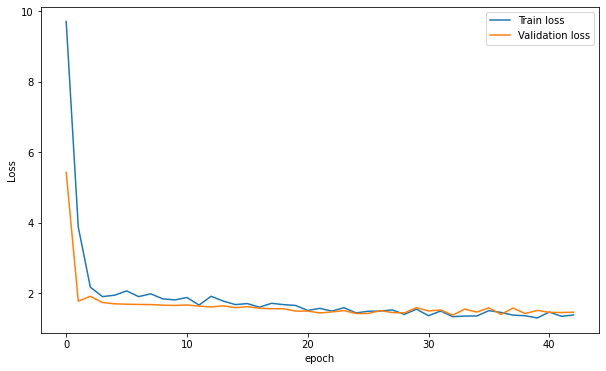

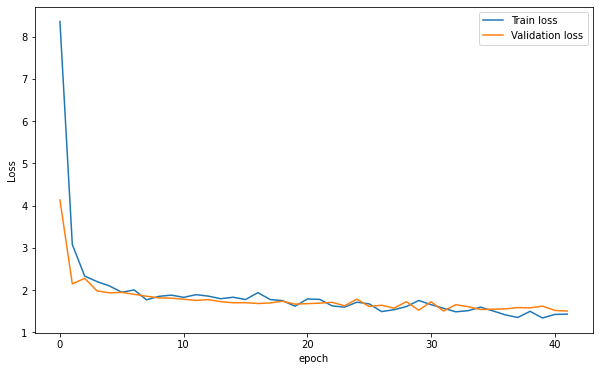

In [ ]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

###**Testing the deep learning models**

In [ ]:
dataset_X_test1 = dataset_X_test.values.reshape(40,12,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm = prediction_func(model_bilstm)
prediction_lstm = prediction_func(model_lstm)
prediction_gru = prediction_func(model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm.round(), dataset_y_test))
print(classification_report(prediction_bilstm.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_bilstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm.round(), dataset_y_test))
print(classification_report(prediction_lstm.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_lstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru.round(), dataset_y_test))
print(classification_report(prediction_gru.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_gru.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru.round(), dataset_y_test,average='macro'))


Accuracy :  0.175
              precision    recall  f1-score   support

         1.0       0.09      0.33      0.14         3
         2.0       0.12      0.14      0.13         7
         3.0       0.43      0.25      0.32        12
         4.0       0.50      0.06      0.11        17
         5.0       0.08      1.00      0.15         1

    accuracy                           0.17        40
   macro avg       0.25      0.36      0.17        40
weighted avg       0.37      0.17      0.18        40

Accuracy :  0.15
              precision    recall  f1-score   support

         1.0       0.09      0.50      0.15         2
         2.0       0.12      0.17      0.14         6
         3.0       0.43      0.21      0.29        14
         4.0       0.50      0.06      0.10        18
         5.0       0.00      0.00      0.00         0

    accuracy                           0.15        40
   macro avg       0.23      0.19      0.14        40
weighted avg       0.40      0.15      0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**AFTER HYPERPARAMETER TUNING**

###**Creating models**

In [ ]:
# Create BiLSTM model
def create_best_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model
# Create LSTM or GRU model
def create_best_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model

# BiLSTM
best_model_bilstm = create_best_model_bilstm(32)
# GRU and LSTM
best_model_gru = create_best_model(32, GRU)
best_model_lstm = create_best_model(32, LSTM)

##**Hyperparameter Tuning - 1 : Best Epoch Value**

In [ ]:
def best_ep_fit_model(model,ep):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = ep,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks=[early_stop])
    return history


###**Training models for range of epoch values and measure Mean Square Error(mse) score**

In [ ]:
epochs_range= [500,1000,2000,5000,7000]
mse_dict_bilstm1 = {}
mse_dict_lstm1 = {}
mse_dict_gru1 = {}
for i in epochs_range:
  history_bilstm1 = best_ep_fit_model(best_model_bilstm,i)
  mse_dict_bilstm1[i]=history_bilstm1.history['mse']
  history_lstm1 = best_ep_fit_model(best_model_lstm,i)
  mse_dict_lstm1[i]=history_lstm1.history['mse']
  history_gru1 = best_ep_fit_model(best_model_gru,i)
  mse_dict_gru1[i]=history_gru1.history['mse']

Epoch 1/500
13/13 [==============================] - 9s 160ms/step - loss: 8.0948 - mse: 8.0948 - val_loss: 3.1313 - val_mse: 3.1313
Epoch 2/500
13/13 [==============================] - 0s 19ms/step - loss: 2.3680 - mse: 2.3680 - val_loss: 1.9221 - val_mse: 1.9221
Epoch 3/500
13/13 [==============================] - 0s 21ms/step - loss: 1.9077 - mse: 1.9077 - val_loss: 1.6941 - val_mse: 1.6941
Epoch 4/500
13/13 [==============================] - 0s 18ms/step - loss: 1.7142 - mse: 1.7142 - val_loss: 1.5875 - val_mse: 1.5875
Epoch 5/500
13/13 [==============================] - 0s 19ms/step - loss: 1.6395 - mse: 1.6395 - val_loss: 1.5720 - val_mse: 1.5720
Epoch 6/500
13/13 [==============================] - 0s 19ms/step - loss: 1.5541 - mse: 1.5541 - val_loss: 1.5400 - val_mse: 1.5400
Epoch 7/500
13/13 [==============================] - 0s 20ms/step - loss: 1.5076 - mse: 1.5076 - val_loss: 1.5381 - val_mse: 1.5381
Epoch 8/500
13/13 [==============================] - 0s 19ms/step - loss: 1

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [ ]:
mse_dict_bilstm1

{500: [8.094812393188477,
  2.367955207824707,
  1.9076827764511108,
  1.7141778469085693,
  1.639535903930664,
  1.5540519952774048,
  1.5075739622116089,
  1.4582908153533936,
  1.4255027770996094,
  1.3891441822052002,
  1.3581955432891846,
  1.3173836469650269,
  1.2865384817123413,
  1.2603166103363037,
  1.2386752367019653,
  1.2181161642074585,
  1.201119065284729,
  1.1858477592468262,
  1.1714433431625366,
  1.158339023590088,
  1.146695613861084,
  1.1342967748641968,
  1.1232134103775024,
  1.1135097742080688,
  1.1036145687103271,
  1.0938972234725952,
  1.0845166444778442,
  1.0750337839126587,
  1.065330147743225,
  1.0554792881011963,
  1.0455715656280518,
  1.0355466604232788,
  1.0251656770706177,
  1.0144084692001343,
  1.0033377408981323,
  0.9918860793113708,
  0.9799491763114929,
  0.9674514532089233,
  0.9543665051460266,
  0.9407278299331665,
  0.9263725280761719,
  0.9116702079772949,
  0.8962433338165283,
  0.8796164989471436,
  0.8621192574501038,
  0.84388893

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [ ]:
for i in epochs_range:
  mse_dict_bilstm1[i] = mse_dict_bilstm1[i][-10:]
  mse_dict_lstm1[i] = mse_dict_lstm1[i][-10:]
  mse_dict_gru1[i] = mse_dict_gru1[i][-10:]

###**Bilstm**

In [ ]:
mse_epochs_bilstm1 = pd.DataFrame.from_dict(mse_dict_bilstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_bilstm1

,500,1000,2000,5000,7000
mean,0.829789,0.637429,0.396624,0.260443,0.204955
std,0.039314,0.099960,0.034125,0.025722,0.018328
min,0.782197,0.512254,0.350739,0.208536,0.184066
25%,0.797069,0.548220,0.368273,0.252794,0.187782
50%,0.821143,0.640594,0.403745,0.264568,0.203245
75%,0.857562,0.717125,0.410882,0.278479,0.218027
max,0.896243,0.800480,0.456178,0.294498,0.233457


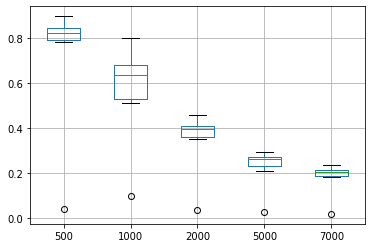

In [ ]:
boxplot_11 = mse_epochs_bilstm1.boxplot(column=[500,1000,2000,5000,7000])

###**Lstm**

In [ ]:
mse_epochs_lstm1 = pd.DataFrame.from_dict(mse_dict_lstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_lstm1

,500,1000,2000,5000,7000
mean,1.347860,1.227507,1.074294,0.962929,0.867887
std,0.083842,0.061365,0.031960,0.066875,0.062676
min,1.147269,1.158152,1.037190,0.833979,0.773256
25%,1.323586,1.177142,1.057185,0.919306,0.820098
50%,1.357884,1.208037,1.070301,0.982379,0.860912
75%,1.400658,1.269707,1.078599,0.988914,0.908463
max,1.450610,1.333502,1.142290,1.053789,0.959687


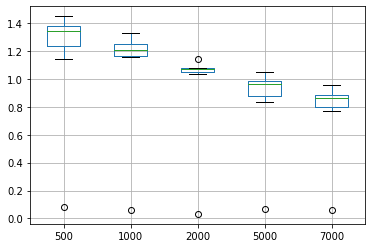

In [ ]:
boxplot_12 = mse_epochs_lstm1.boxplot(column=[500,1000,2000,5000,7000])

###**GRU**

In [ ]:
mse_epochs_gru1 = pd.DataFrame.from_dict(mse_dict_gru1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_gru1

,500,1000,2000,5000,7000
mean,1.343130,1.276817,1.163001,1.128837,1.009558
std,0.084123,0.085565,0.051295,0.089632,0.083714
min,1.252478,1.166137,1.099284,0.997077,0.870097
25%,1.289002,1.214562,1.113006,1.078200,0.963959
50%,1.310102,1.257492,1.176038,1.124289,1.020691
75%,1.379161,1.310432,1.182077,1.152655,1.079866
max,1.483971,1.421539,1.249894,1.336939,1.110248


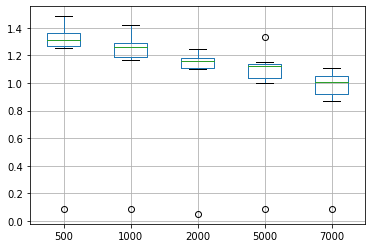

In [ ]:
boxplot_13 = mse_epochs_gru1.boxplot(column=[500,1000,2000,5000,7000])

##**Hyperparameter Tuning - 2 : Best Batch Size**

In [ ]:
def best_bs_fit_model(model,bs):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = bs, 
                        shuffle = False, callbacks=[early_stop])
    return history

###**Training models for range of batch size values and measure Mean Square Error(mse) score**

In [ ]:
batch_range = [4,5,8,10,20]
mse_dict_bilstm2 = {}
mse_dict_lstm2 = {}
mse_dict_gru2 = {}
for i in batch_range:
  history_bilstm2 = best_bs_fit_model(best_model_bilstm,i)
  mse_dict_bilstm2[i]=history_bilstm2.history['mse']
  history_lstm2 = best_bs_fit_model(best_model_lstm,i)
  mse_dict_lstm2[i]=history_lstm2.history['mse']
  history_gru2 = best_bs_fit_model(best_model_gru,i)
  mse_dict_gru2[i]=history_gru2.history['mse']


Epoch 1/7000
32/32 [==============================] - 5s 70ms/step - loss: 0.7174 - mse: 0.7174 - val_loss: 1.5377 - val_mse: 1.5377
Epoch 2/7000
32/32 [==============================] - 0s 14ms/step - loss: 0.8098 - mse: 0.8098 - val_loss: 1.4983 - val_mse: 1.4983
Epoch 3/7000
32/32 [==============================] - 0s 13ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 1.3228 - val_mse: 1.3228
Epoch 4/7000
32/32 [==============================] - 0s 13ms/step - loss: 0.7189 - mse: 0.7189 - val_loss: 1.2715 - val_mse: 1.2715
Epoch 5/7000
32/32 [==============================] - 0s 13ms/step - loss: 0.6257 - mse: 0.6257 - val_loss: 1.6440 - val_mse: 1.6440
Epoch 6/7000
32/32 [==============================] - 0s 14ms/step - loss: 0.4770 - mse: 0.4770 - val_loss: 1.7780 - val_mse: 1.7780
Epoch 7/7000
32/32 [==============================] - 0s 14ms/step - loss: 0.4488 - mse: 0.4488 - val_loss: 1.7703 - val_mse: 1.7703
Epoch 8/7000
32/32 [==============================] - 0s 14ms/step - 

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [ ]:
mse_dict_bilstm2

{4: [0.7173937559127808,
  0.8097977638244629,
  0.5710104703903198,
  0.7189394235610962,
  0.6257376670837402,
  0.4769534468650818,
  0.4487907588481903,
  0.3192281126976013,
  0.3342841863632202,
  0.45517048239707947,
  0.38539958000183105,
  0.2975863814353943,
  0.2731093764305115,
  0.24865342676639557],
 5: [0.2022400200366974,
  0.247376948595047,
  0.17287638783454895,
  0.177249014377594,
  0.1609533131122589,
  0.15792974829673767,
  0.14605554938316345,
  0.15985314548015594,
  0.1455744206905365,
  0.1441735029220581,
  0.17009501159191132],
 8: [0.17952878773212433,
  0.2162003368139267,
  0.16371643543243408,
  0.12274601310491562,
  0.09975079447031021,
  0.10540522634983063,
  0.09366468340158463,
  0.08349574357271194,
  0.0734076052904129,
  0.07417278736829758,
  0.07389065623283386,
  0.07105876505374908,
  0.06758736819028854],
 10: [0.05731404572725296,
  0.05243740975856781,
  0.05248603969812393,
  0.054442811757326126,
  0.051215413957834244,
  0.0448118634

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [ ]:
for i in batch_range:
  mse_dict_bilstm2[i] = mse_dict_bilstm2[i][-10:]
  mse_dict_lstm2[i] = mse_dict_lstm2[i][-10:]
  mse_dict_gru2[i] = mse_dict_gru2[i][-10:]

###**Bilstm**

In [ ]:
mse_batch_bilstm2 = pd.DataFrame.from_dict(mse_dict_bilstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_bilstm2

,4,5,8,10,20
mean,0.386491,0.168214,0.086518,0.048672,0.037242
std,0.115965,0.030154,0.018214,0.004509,0.005874
min,0.248653,0.144174,0.067587,0.041951,0.031282
25%,0.302997,0.149024,0.073528,0.044987,0.034086
50%,0.359842,0.160403,0.078834,0.050454,0.035325
75%,0.453576,0.172181,0.098229,0.052195,0.037767
max,0.625738,0.247377,0.122746,0.054443,0.048401


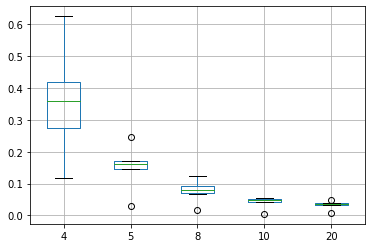

In [ ]:
boxplot_21 = mse_batch_bilstm2.boxplot(column=[4,5,8,10,20])

###**Lstm**

In [ ]:
mse_batch_lstm2 = pd.DataFrame.from_dict(mse_dict_lstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_lstm2

,4,5,8,10,20
mean,0.768004,0.692613,0.612510,0.517263,0.476371
std,0.087861,0.040078,0.042623,0.058453,0.043957
min,0.633558,0.627322,0.562348,0.428593,0.372810
25%,0.690774,0.673880,0.592508,0.488230,0.464310
50%,0.785966,0.677823,0.598207,0.510867,0.484800
75%,0.822776,0.717676,0.626827,0.540236,0.508063
max,0.918551,0.772608,0.715509,0.640400,0.518923


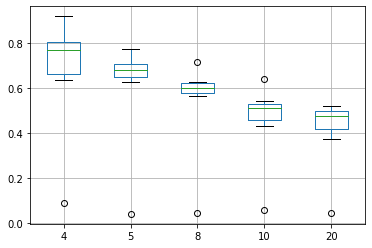

In [ ]:
boxplot_22 = mse_batch_lstm2.boxplot(column=[4,5,8,10,20])

###**GRU**

In [ ]:
mse_batch_gru2 = pd.DataFrame.from_dict(mse_dict_gru2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_gru2

,4,5,8,10,20
mean,0.814756,0.684107,0.568947,0.498430,0.455379
std,0.073538,0.081429,0.044570,0.058496,0.048583
min,0.686447,0.585626,0.522790,0.387170,0.388306
25%,0.780207,0.614858,0.537008,0.458019,0.432098
50%,0.821163,0.672236,0.563114,0.508876,0.451483
75%,0.854887,0.760433,0.570333,0.536553,0.472383
max,0.947473,0.794900,0.671054,0.590114,0.555881


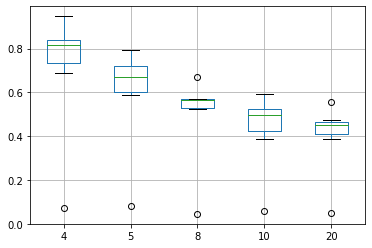

In [ ]:
boxplot_23 = mse_batch_gru2.boxplot(column=[4,5,8,10,20])

##**Training the Models**

In [ ]:
def best_fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = 20, 
                        shuffle = False, callbacks=[early_stop])
    return history

In [ ]:
history_bilstm_best = best_fit_model(best_model_bilstm)

Epoch 1/7000
7/7 [==============================] - 0s 28ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 2.6035 - val_mse: 2.6035
Epoch 2/7000
7/7 [==============================] - 0s 21ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 2.5832 - val_mse: 2.5832
Epoch 3/7000
7/7 [==============================] - 0s 26ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 2.6125 - val_mse: 2.6125
Epoch 4/7000
7/7 [==============================] - 0s 22ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 2.5851 - val_mse: 2.5851
Epoch 5/7000
7/7 [==============================] - 0s 25ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 2.6157 - val_mse: 2.6157
Epoch 6/7000
7/7 [==============================] - 0s 24ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 2.5909 - val_mse: 2.5909
Epoch 7/7000
7/7 [==============================] - 0s 22ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 2.6191 - val_mse: 2.6191
Epoch 8/7000
7/7 [==============================] - 0s 22ms/step - loss: 0.0339 - m

In [ ]:
history_lstm_best = best_fit_model(best_model_lstm)

Epoch 1/7000
7/7 [==============================] - 0s 23ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 1.9075 - val_mse: 1.9075
Epoch 2/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 1.9124 - val_mse: 1.9124
Epoch 3/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.3981 - mse: 0.3981 - val_loss: 2.0220 - val_mse: 2.0220
Epoch 4/7000
7/7 [==============================] - 0s 16ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 1.9361 - val_mse: 1.9361
Epoch 5/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.4694 - mse: 0.4694 - val_loss: 1.9856 - val_mse: 1.9856
Epoch 6/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.4770 - mse: 0.4770 - val_loss: 2.0880 - val_mse: 2.0880
Epoch 7/7000
7/7 [==============================] - 0s 16ms/step - loss: 0.4515 - mse: 0.4515 - val_loss: 2.0204 - val_mse: 2.0204
Epoch 8/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.4352 - m

In [ ]:
history_gru_best = best_fit_model(best_model_gru)

Epoch 1/7000
7/7 [==============================] - 0s 22ms/step - loss: 0.3760 - mse: 0.3760 - val_loss: 1.4279 - val_mse: 1.4279
Epoch 2/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.3476 - mse: 0.3476 - val_loss: 1.5903 - val_mse: 1.5903
Epoch 3/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.4799 - mse: 0.4799 - val_loss: 1.4654 - val_mse: 1.4654
Epoch 4/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.3377 - mse: 0.3377 - val_loss: 1.4664 - val_mse: 1.4664
Epoch 5/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.4387 - mse: 0.4387 - val_loss: 1.5081 - val_mse: 1.5081
Epoch 6/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.4649 - mse: 0.4649 - val_loss: 1.4473 - val_mse: 1.4473
Epoch 7/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.3778 - mse: 0.3778 - val_loss: 1.5168 - val_mse: 1.5168
Epoch 8/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.4227 - m

##**Plotting train loss and validation loss graph**

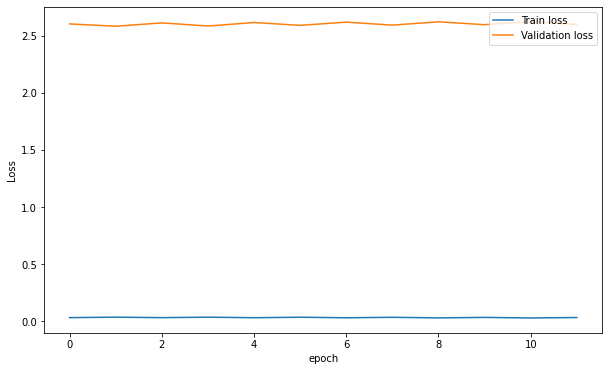

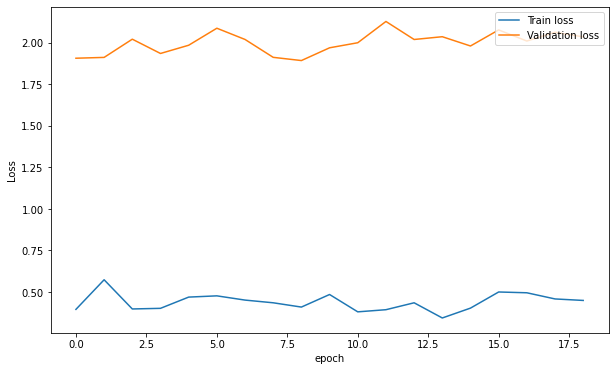

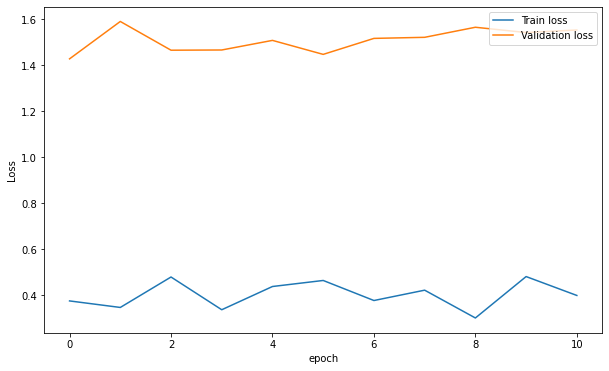

In [ ]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm_best)
plot_loss (history_lstm_best)
plot_loss (history_gru_best)

##**Testing the models**

In [ ]:
dataset_X_test1 = dataset_X_test.values.reshape(40,12,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def best_prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm_best = best_prediction_func(best_model_bilstm)
prediction_lstm_best = best_prediction_func(best_model_lstm)
prediction_gru_best = best_prediction_func(best_model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
print(classification_report(prediction_bilstm_best.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))



print("Accuracy : ", accuracy_score(prediction_lstm_best.round(), dataset_y_test))
print(classification_report(prediction_lstm_best.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_lstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru_best.round(), dataset_y_test))
print(classification_report(prediction_gru_best.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_gru_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru_best.round(), dataset_y_test,average='macro'))

Accuracy :  0.3
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.45      0.56      0.50         9
         2.0       0.25      0.33      0.29         6
         3.0       0.43      0.27      0.33        11
         4.0       0.00      0.00      0.00         9
         5.0       0.17      0.50      0.25         4

    accuracy                           0.30        40
   macro avg       0.22      0.28      0.23        40
weighted avg       0.27      0.30      0.27        40

Accuracy :  0.225
              precision    recall  f1-score   support

         1.0       0.27      0.43      0.33         7
         2.0       0.25      0.20      0.22        10
         3.0       0.29      0.40      0.33         5
         4.0       0.00      0.00      0.00        13
         5.0       0.17      0.40      0.24         5

    accuracy                           0.23        40
   macro avg       0.20      0.29      0.22

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


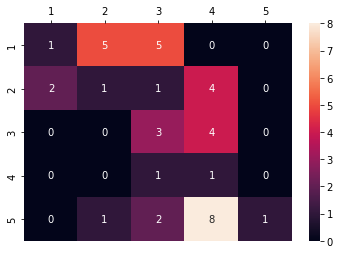

In [ ]:
dl_cm = confusion_matrix(dataset_y_test,prediction_bilstm_best.round())
ax = sns.heatmap(dl_cm,xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5],annot=True)
ax.xaxis.set_ticks_position('top')
plt.show()

#**Scores Evaluation**

In [ ]:
scores = pd.DataFrame (Classifier,columns=['Classifier'])
scores['Type'] = Type
scores['Hyperparameter_Tuning'] = hyper
scores['Accuracy'] = Accuracy
scores['Recall'] = Recall
scores['Precision'] = Precision
scores['F1_score'] = F1_score

In [ ]:
scores

,Classifier,Type,Hyperparameter_Tuning,Accuracy,Recall,Precision,F1_score
0,SVM,ML,No,0.250,0.311905,0.320222,0.202597
1,LR,ML,No,0.225,0.316667,0.100000,0.133333
2,RF,ML,No,0.450,0.467100,0.477150,0.427834
3,SVM,ML,Yes,0.325,0.292100,0.436111,0.319960
4,LR,ML,Yes,0.425,0.510498,0.439935,0.405460
5,RF,ML,Yes,0.500,0.602489,0.532554,0.487810
6,BILSTM,DL,No,0.175,0.357003,0.245563,0.170218
7,LSTM,DL,No,0.150,0.187302,0.228896,0.136484
8,GRU,DL,No,0.175,0.110000,0.260714,0.143238
9,BILSTM,DL,Yes,0.300,0.276936,0.216631,0.228175


##**Comparision of Machine Learning models before and after hyperparameter tuning**

In [ ]:
ml_scores = scores.loc[scores['Type']=="ML"]

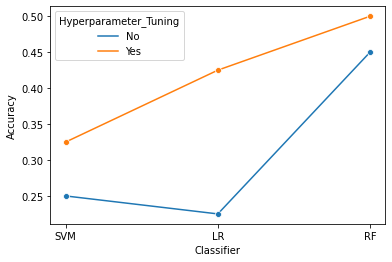

In [ ]:
import seaborn as sns
sns.lineplot(x='Classifier',y='Accuracy',data=ml_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Deep Learning models before and after hyperparameter tuning**

In [ ]:
dl_scores= scores.loc[scores['Type']=="DL"]

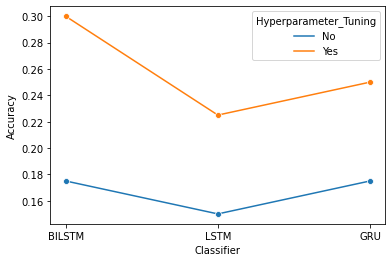

In [ ]:
sns.lineplot(x='Classifier',y='Accuracy',data=dl_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Machine Learning and Deep Learning models after hyperparameter tuning as performance was better only after hyperparameter tuning**

In [ ]:
com_scores = scores.loc[scores['Hyperparameter_Tuning']=="Yes"]

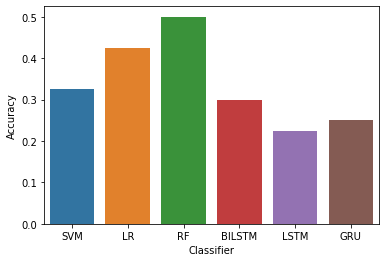

In [ ]:
sns.barplot(x='Classifier',y='Accuracy',data=com_scores)